In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
 #Set options to display maximum rows & columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# Step 1: Create dummy non-linear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

In [5]:
# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

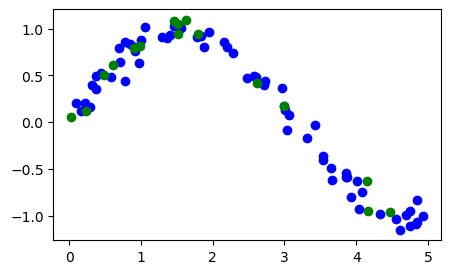

In [6]:
# Step 3: Displaying Scatter Plots for the train-test datasets
plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='green', label="Testing Data")

In [7]:
# Step 4: Model training
model = LinearRegression()
model = model.fit(X_train, y_train)
model

LinearRegression()

In [8]:
# Step 5: Generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f'Target/Label train data predicted values:\n{y_train_pred}')
print(f'Target/Label test data predicted values:\n{y_test_pred}')

Target/Label train data predicted values:
[-0.75723253 -0.43309379 -0.26252695  0.21050134  0.89201873 -0.4911412
  0.95095118  0.00399226  0.372129   -0.43869084  0.10386397 -0.22045151
  0.76115301  0.22640744 -0.3063729  -0.84907051  0.92001867 -0.09668341
 -0.12225419  0.70807917 -0.51684771  0.56200144  0.05562498  0.79317805
 -0.80787848  0.97586675  0.73304137  0.31026034  0.91903806 -0.50315752
  0.93744723  0.35350769 -0.72307583 -0.34929928  0.01177177 -0.8161689
  0.76119975  0.51906594  0.17965323  0.53764261 -0.0845827   0.65200389
  0.06693047 -0.81553862 -0.30872802  0.83896293  0.45942093 -0.77896792
 -0.35508765 -0.45815445 -0.61513288  0.33765819  0.49734068  1.02362451
 -0.1139052   0.68370231  0.99687229  0.67654931 -0.77542376  0.70526917
 -0.43120536 -0.69874649  0.790406   -0.10144416]
Target/Label test data predicted values:
[ 0.47389553  1.05281541  0.67840611  0.47317551  0.71114033  0.49911494
  0.87422863 -0.67065894  0.97349634  0.82700707 -0.09521343  0.43

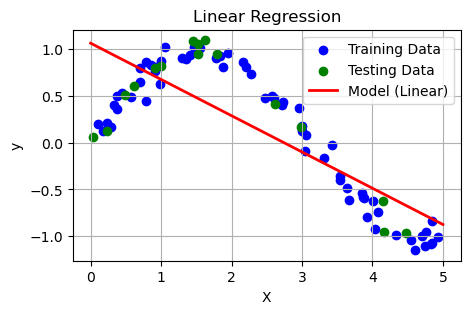

In [9]:
# Step 6

plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='green', label="Testing Data")

# Straight line model prediction
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label="Model (Linear)")

plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Step 7 - Model evaluation using R2 score
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
print(f'R2 train score: {r2_score_train}\nR2 test score: {r2_score_test}')

R2 train score: 0.6927322218080088
R2 test score: 0.44718684352387306


In [12]:
# Step 8 - Model correction using PolynomialFeatures --> This curves the line and figurs out if R square is increaosing or not
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train_poly.shape)
print(X_test_poly.shape)

(64, 1)
(16, 1)
(64,)
(16,)
(64, 3)
(16, 3)


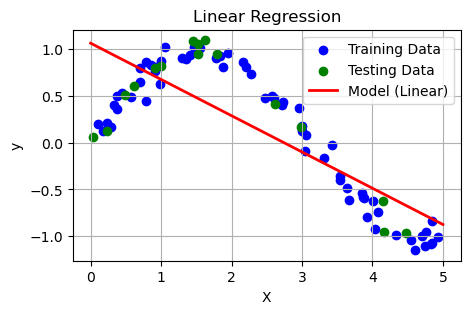

In [14]:
# Step 9

plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='green', label="Testing Data")

# Straight line model prediction
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label="Model (Linear)")

plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
     


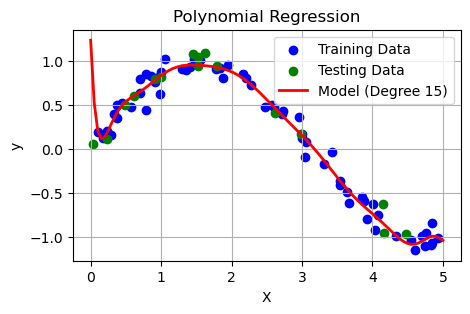

Train MSE: 0.0086
Test MSE: 0.0408


In [15]:
#Experiment 1

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Create dummy non-linear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)  # Inputs from 0 to 5
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sine function + noise

#  Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 3: Create and train a high-degree polynomial regression model
degree = 15  # Very high to cause overfitting
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

#  Step 4: Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#  Step 5: Visualize the overfit model
plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='green', label="Testing Data")

# Smooth curve for model prediction
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f"Model (Degree {degree})")

plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 📈 Step 6: Print errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_error:.4f}")
print(f"Test MSE: {test_error:.4f}")
     


In [ ]:
# for more, just see this one https://github.com/edquestofficial/mlops-training/blob/main/03_day3/AI_ML_Ops_EXL_Jul_2025_Day_3.ipynb